In [48]:
# Reading the data
import pandas as pd
us=pd.read_csv("UsArrests.csv")
us.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [49]:
# Checking for nan values
us.isna().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [50]:
# Checking for unusual values
us.City.unique()
us.Murder.unique()
us.Assault.unique()
us.UrbanPop.unique()
us.Rape.unique()

array([21.2, 44.5, 31. , 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2,
       14.2, 24. , 21. , 11.3, 18. , 16.3, 22.2,  7.8, 27.8, 35.1, 14.9,
       17.1, 28.2, 16.4, 16.5, 46. ,  9.5, 18.8, 32.1, 26.1, 16.1,  7.3,
       21.4, 20. , 29.3,  8.3, 22.5, 12.8, 26.9, 25.5, 22.9, 11.2, 20.7,
       26.2,  9.3, 10.8, 15.6])

In [51]:
# Checking the column types
us.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [52]:
# Checking statistics
us.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [54]:
# Sanity check
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


array([[<AxesSubplot: title={'center': 'Murder'}>,
        <AxesSubplot: title={'center': 'Assault'}>],
       [<AxesSubplot: title={'center': 'UrbanPop'}>,
        <AxesSubplot: title={'center': 'Rape'}>]], dtype=object)

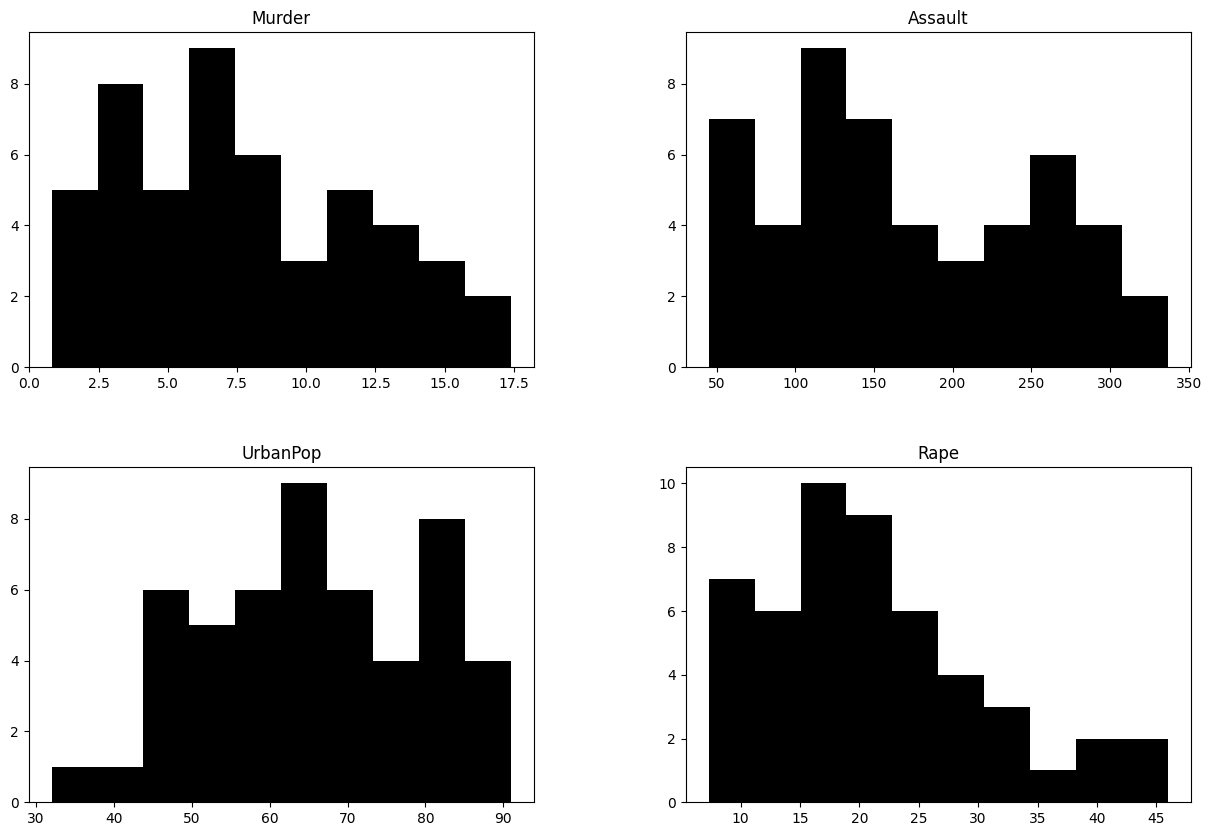

In [55]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
us.hist(color='black', grid=False, figsize=(15, 10))

In [75]:
# Computing correlation
countries = us.index
corr_df = us.drop(["City"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

C:\Users\Jozsef\AppData\Local\Temp\ipykernel_2696\65153266.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


<AxesSubplot: >

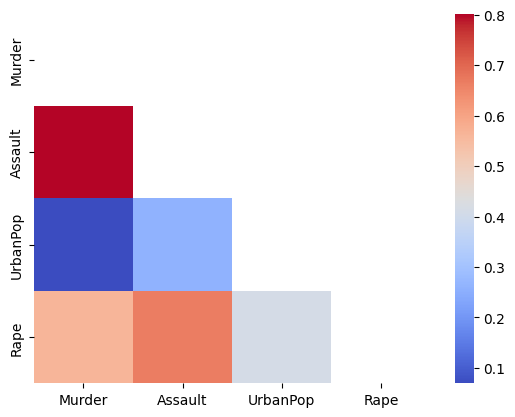

In [57]:
# Visualizing correlation
import seaborn as sns
import numpy as np
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

In [58]:
# Using pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = us.drop(["City"],axis=1).values.squeeze()
x_std = StandardScaler().fit_transform(x)
pca = PCA()

x_trans = pca.fit_transform(x_std)

df_pca = pd.DataFrame(x_trans)
df_pca.head()

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [ ]:
# Plotting the heatmap for the simplified dataset
import matplotlib.pyplot as plt
colormap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df_pca.corr(), cmap=colormap,linewidth=1)
plt.show()

In [59]:
# Initializing the KMeans model
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [60]:
# Generating prediction
y_predicted=km.fit_predict(df_pca[[0,1,2,3]])

KMeans

In [62]:
# Reinitializing the KMeans model
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [63]:
# Allocating the data to clusters
y_predicted=km.fit_predict(us[["Assault","UrbanPop"]])
us["cluster"]=y_predicted
us

,City,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [64]:
# Creating individual datasets
us1=us[us.cluster==0]
us2=us[us.cluster==1]
us3=us[us.cluster==2]

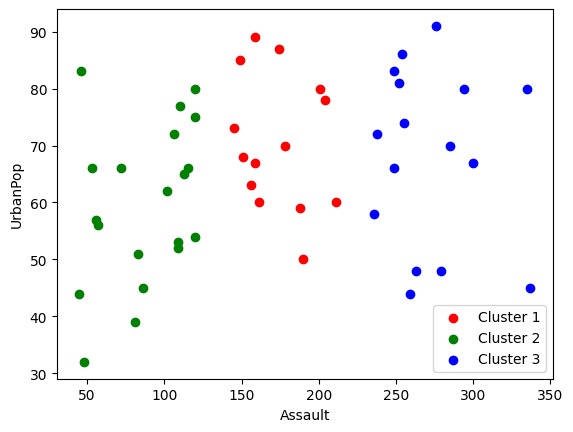

In [65]:
# Plotting
plt.scatter(us1.Assault, us1["UrbanPop"],color="red")
plt.scatter(us2.Assault, us2["UrbanPop"],color="green")
plt.scatter(us3.Assault, us3["UrbanPop"],color="blue")
plt.xlabel("Assault")
plt.ylabel("UrbanPop")
plt.legend(["Cluster 1","Cluster 2","Cluster 3"])

In [66]:
# Checking the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(x, km.labels_)
silhouette_avg

0.5319024108339817

In [67]:
# Importing additional required modules
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [68]:
# Defining x
x=us[["Assault","UrbanPop"]]
x.head()

,Assault,UrbanPop
0,236,58
1,263,48
2,294,80
3,190,50
4,276,91


In [69]:
# Scalling the dataset
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler (feature_range= (0, 1))
x_scalled=min_max_scaler.fit_transform(x)
x=pd.DataFrame(x_scalled, columns=["Assault","UrbanPop"])
x.head()

,Assault,UrbanPop
0,0.654110,0.440678
1,0.746575,0.271186
2,0.852740,0.813559
3,0.496575,0.305085
4,0.791096,1.000000


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [125.0, 125.0, 144.375, 144.375],
  [110.0, 110.0, 134.6875, 134.6875],
  [95.0, 95.0, 122.34375, 122.34375],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [232.5, 232.5, 263.75, 263.75],
  [210.0, 210.0, 248.125, 248.125],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430.0, 430.0],
  [405.0, 405.0, 422.5, 422.5],
  [465.0, 465.0, 4

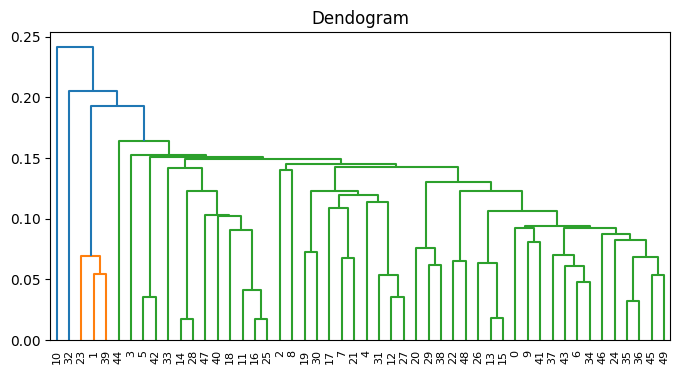

In [70]:
# Plotting
plt.figure(figsize=(8,4))
plt.title("Dendogram")
shc.dendrogram(shc.linkage(x))

In [71]:
# Initializing the model and fitting the data 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3)
y_predicted=cluster.fit_predict(x)
us["cluster2"]=y_predicted

In [72]:
# Checking the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(x, cluster.labels_)
silhouette_avg

0.3177092240739696

In [73]:
# Creating individual datasets
usa1=us[us.cluster2==0]
usa2=us[us.cluster2==1]
usa3=us[us.cluster2==2]

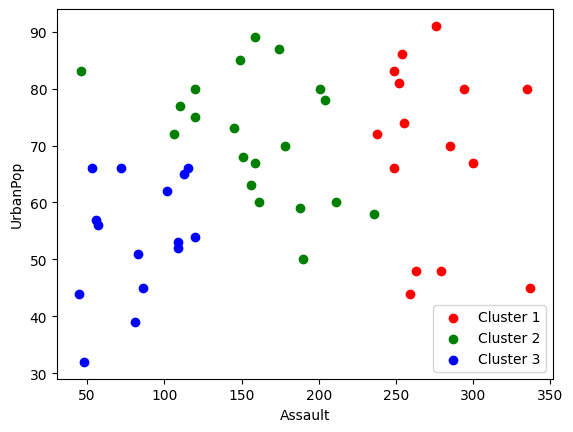

In [74]:
# Plotting
plt.scatter(usa1.Assault, usa1["UrbanPop"],color="red")
plt.scatter(usa2.Assault, usa2["UrbanPop"],color="green")
plt.scatter(usa3.Assault, usa3["UrbanPop"],color="blue")
plt.xlabel("Assault")
plt.ylabel("UrbanPop")
plt.legend(["Cluster 1","Cluster 2","Cluster 3"])

#### "Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished." (Source: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric%20used%20to,each%20other%20and%20clearly%20distinguished.)

#### Our data is not clearly distinguished, the clusters are very close to each other. Therefore, while some models may yield a better score, there is no significant difference between the result achieved.


### Project uploaded to https://github.com/jozsefcsernatoni/T51